## Observations and Insights 

1. Capomulin & Ramicane have  on average the lowest tumor volume at the end
2. Mouse with greater weight generally have a higher average tumor volume
3. Capomulin & Ramicane have the highest number of total measures, and so they have a lower SEM compared to the others
4. Capmulin & Ramicane have an average closest to the their Q2 quartile
5. MOST mice treated with Capomulin have end up with a lower tumor volume than their initial measurement

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(len(merged_data))
merged_data.head()

1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = len(merged_data['Mouse ID'].unique())
print(num_mice)

#Duplicates based off of mouse ID and timepoint
duplicated_ID = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]['Mouse ID'].unique()[0]
duplicated_ID

249


'g989'

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated()]
duplicates[['Mouse ID', 'Timepoint']]


,Mouse ID,Timepoint
909,g989,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data['Mouse ID'] == duplicated_ID, :]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop(merged_data[merged_data['Mouse ID'] == duplicated_ID].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanMice = len(clean_df['Mouse ID'].unique())
print(cleanMice)

248


## Summary Statistics

In [8]:
grouped_df = clean_df.groupby(['Drug Regimen'])
grouped_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [9]:
#Method 3 - Use the functions on groupby objects
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_mean = grouped_df.mean()['Tumor Volume (mm3)']
grouped_median = grouped_df.median()['Tumor Volume (mm3)']
grouped_var = grouped_df.var()['Tumor Volume (mm3)']
grouped_std = grouped_df.std()['Tumor Volume (mm3)']
grouped_sem = grouped_df.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

group_sum = pd.DataFrame({'Mean':grouped_mean, 'Median':grouped_median, 'Variance':grouped_var, 'Standard Deviation':grouped_std, "SEM":grouped_sem})
group_sum

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_df = sum_df.rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
grouped_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<IPython.core.display.Javascript object>


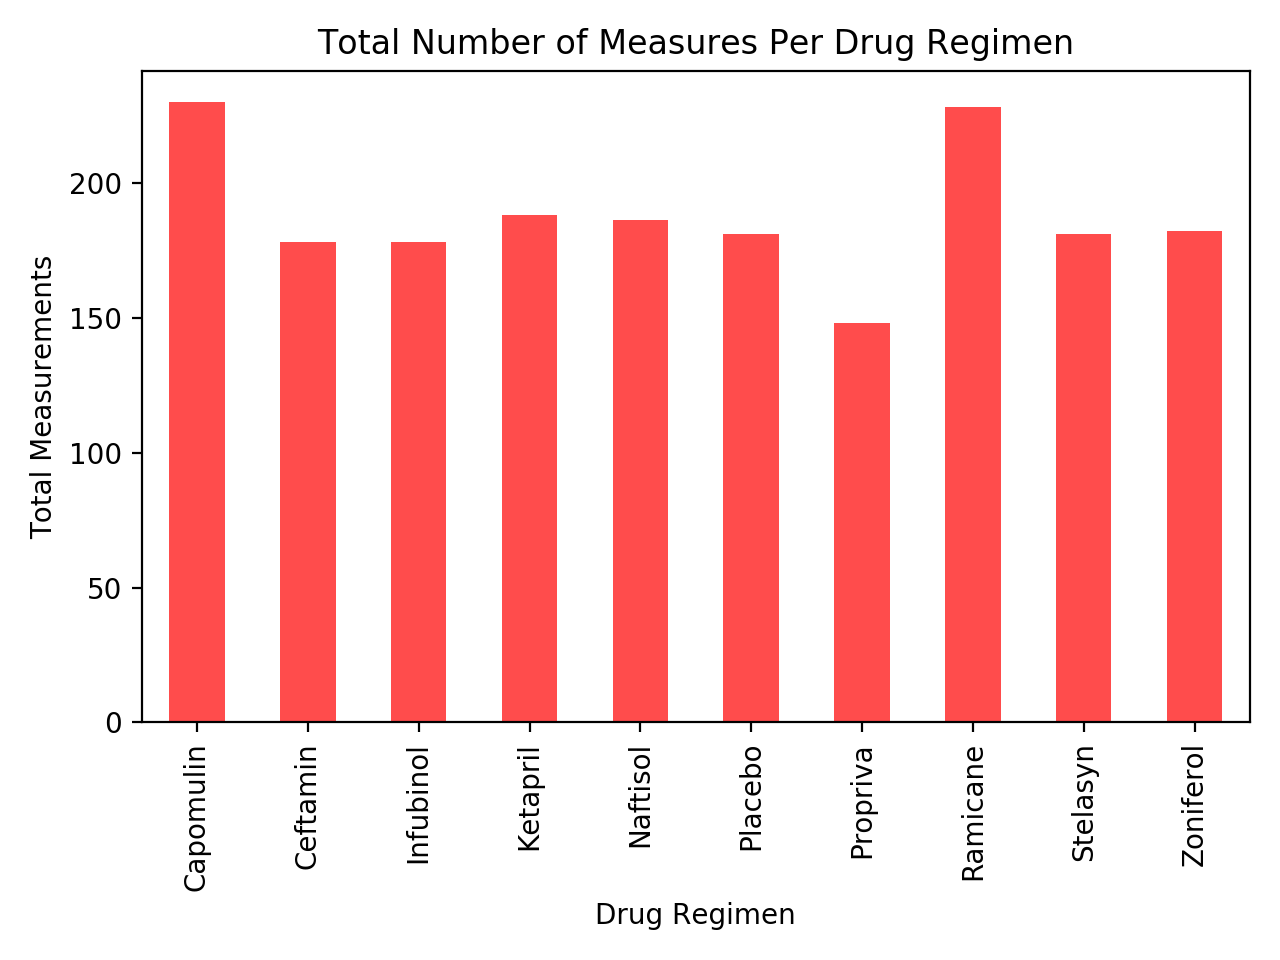

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = grouped_df['Timepoint'].count().plot(kind="bar", color="r", alpha=0.7)
plt.title("Total Number of Measures Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


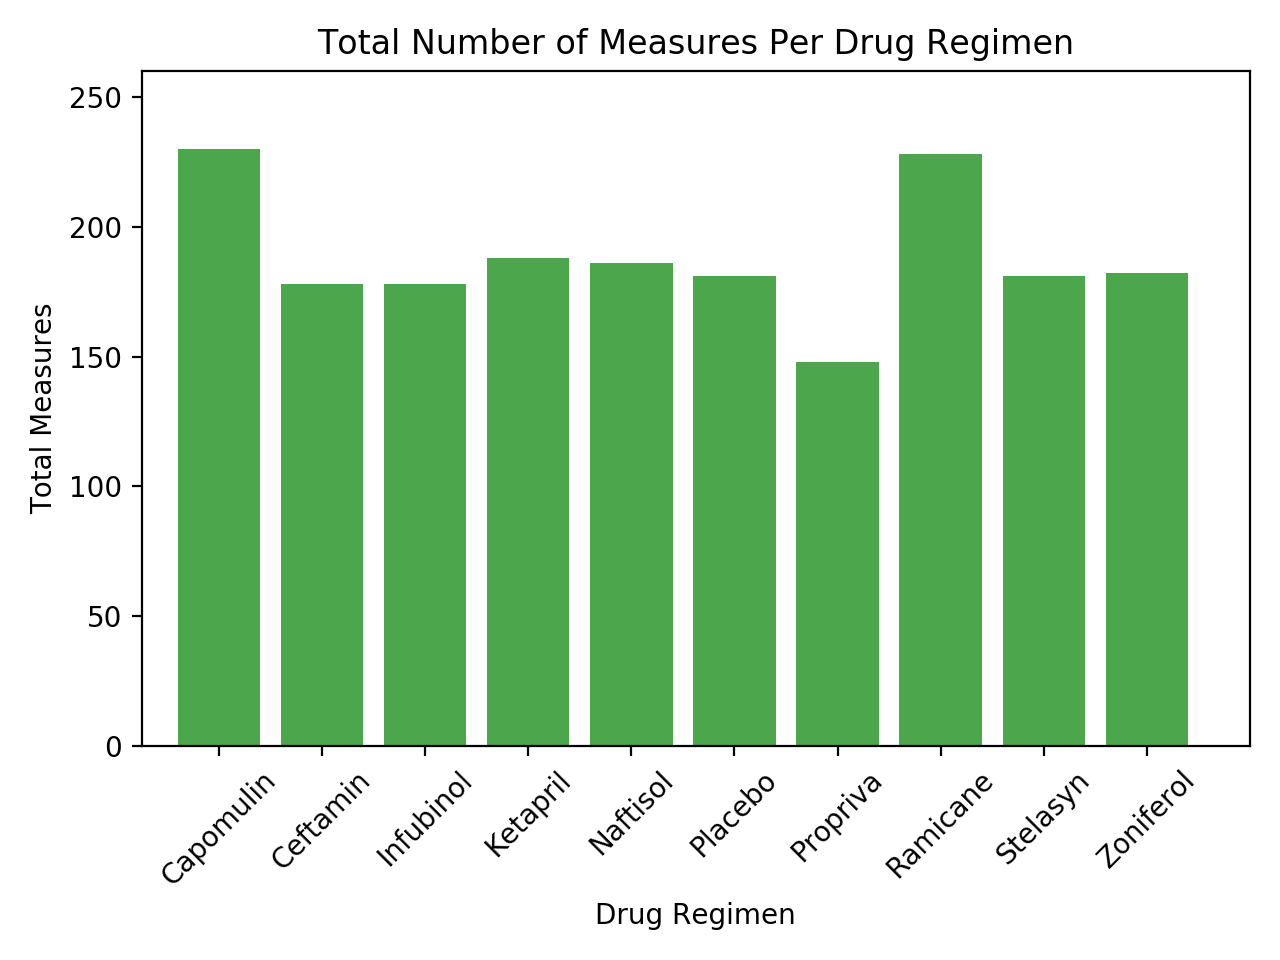

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_labels = [drug for drug in grouped_df['Drug Regimen'].unique().index]
x_labels

#Creating the bar chart
plt.bar(x_labels, grouped_df['Timepoint'].count(), color="g", alpha=0.7, align="center")

#Adjusting the x axis labels and the limits of the axes
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_labels))
plt.ylim(0, max(grouped_df['Timepoint'].count())+30)

#Setting title and labels
plt.title("Total Number of Measures Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measures")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


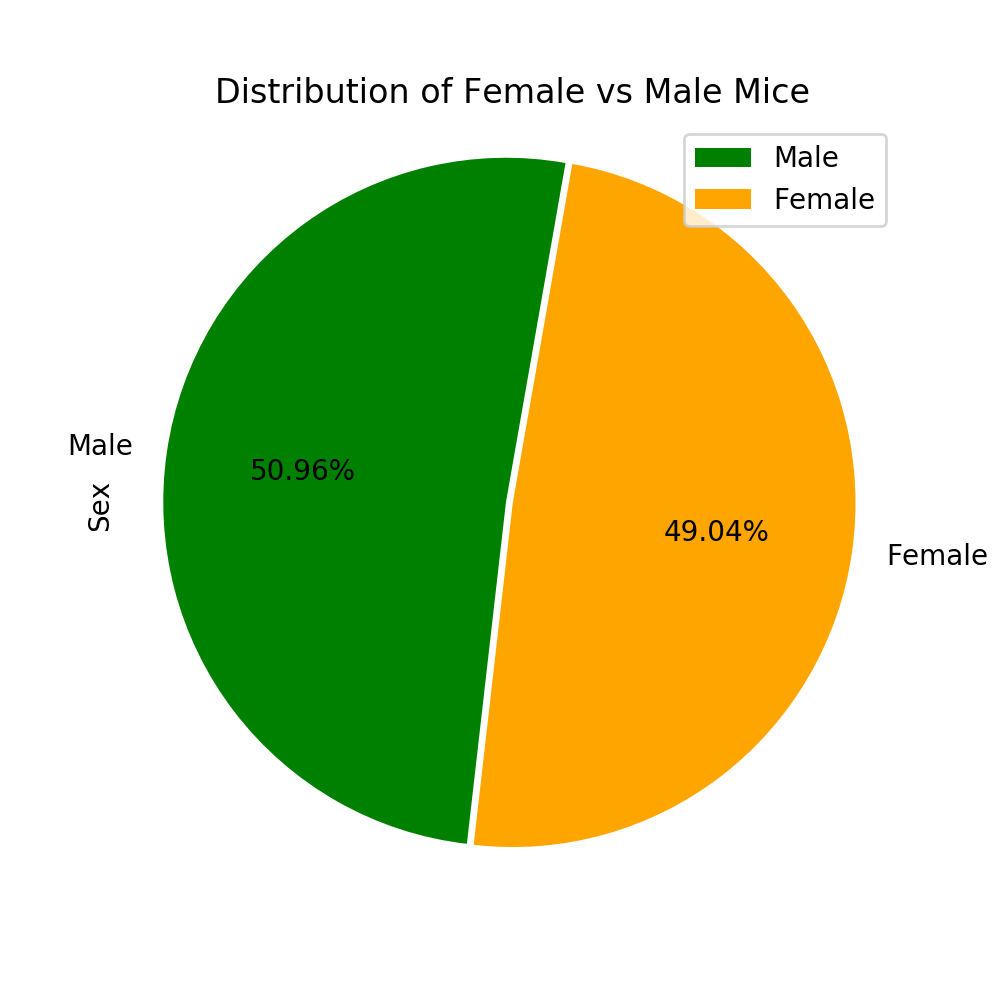

(-1.1116348532474767,
 1.1495741066701608,
 -1.1277114532074763,
 1.109753490604317)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df.head()
sexCount = pd.DataFrame(clean_df['Sex'].value_counts())
sexCount.plot(kind="pie", autopct="%1.2f%%", y='Sex', startangle=80, figsize=(5,5), explode = [0, 0.02], colors=["green", "orange"])
plt.title("Distribution of Female vs Male Mice")
plt.show()
plt.axis("equal")

<IPython.core.display.Javascript object>


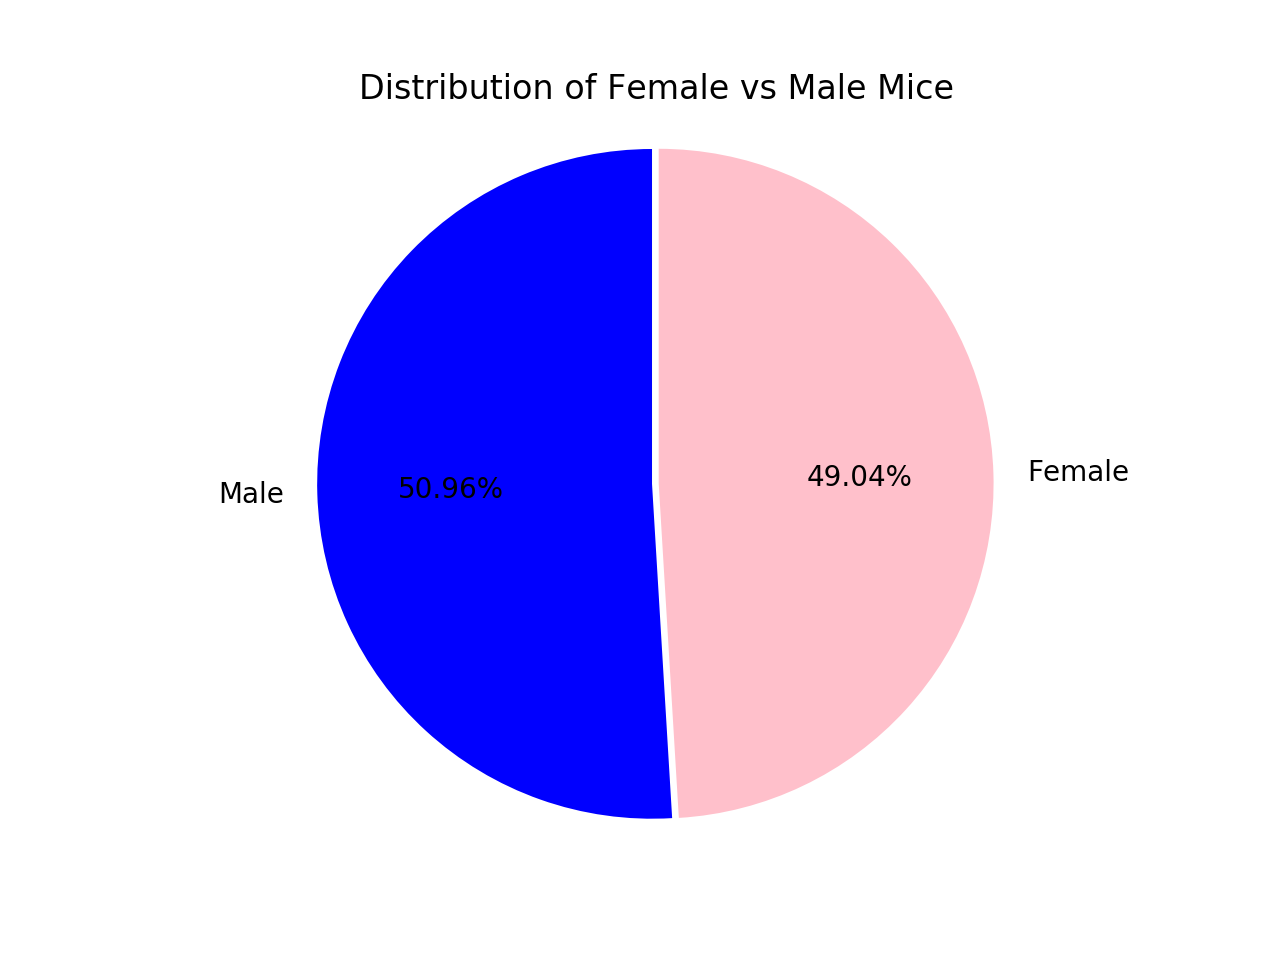

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df=clean_df['Sex'].value_counts()
sex = sex_df.index
sex_count = sex_df.values
colors = ["blue", "pink"]
explode = [0,.02]

plt.pie(sex_count, explode=explode, labels=sex, colors=colors, startangle=90, autopct='%1.2f%%')
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Group by Mouse ID and using the max function on Timepoint collumn for each mouse
max_timepoint = clean_df.groupby(['Mouse ID']).max()['Timepoint']
#Resets the index
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merged_df = max_timepoint.merge(clean_df, on=['Mouse ID', 'Timepoint'], how="left")
new_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = new_merged_df.loc[new_merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    tumor_quantile = tumor_volume.quantile([.25, .5, .75])
    lower_quantile = tumor_quantile[.25]
    upper_quantile = tumor_quantile[.75]
    iqr = upper_quantile - lower_quantile
    lower_bound = lower_quantile - (1.5*iqr)
    upper_bound = upper_quantile + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"The potential outliers for {treatment} is {outliers}")

The potential outliers for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outliers for Infubinol is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The potential outliers for Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


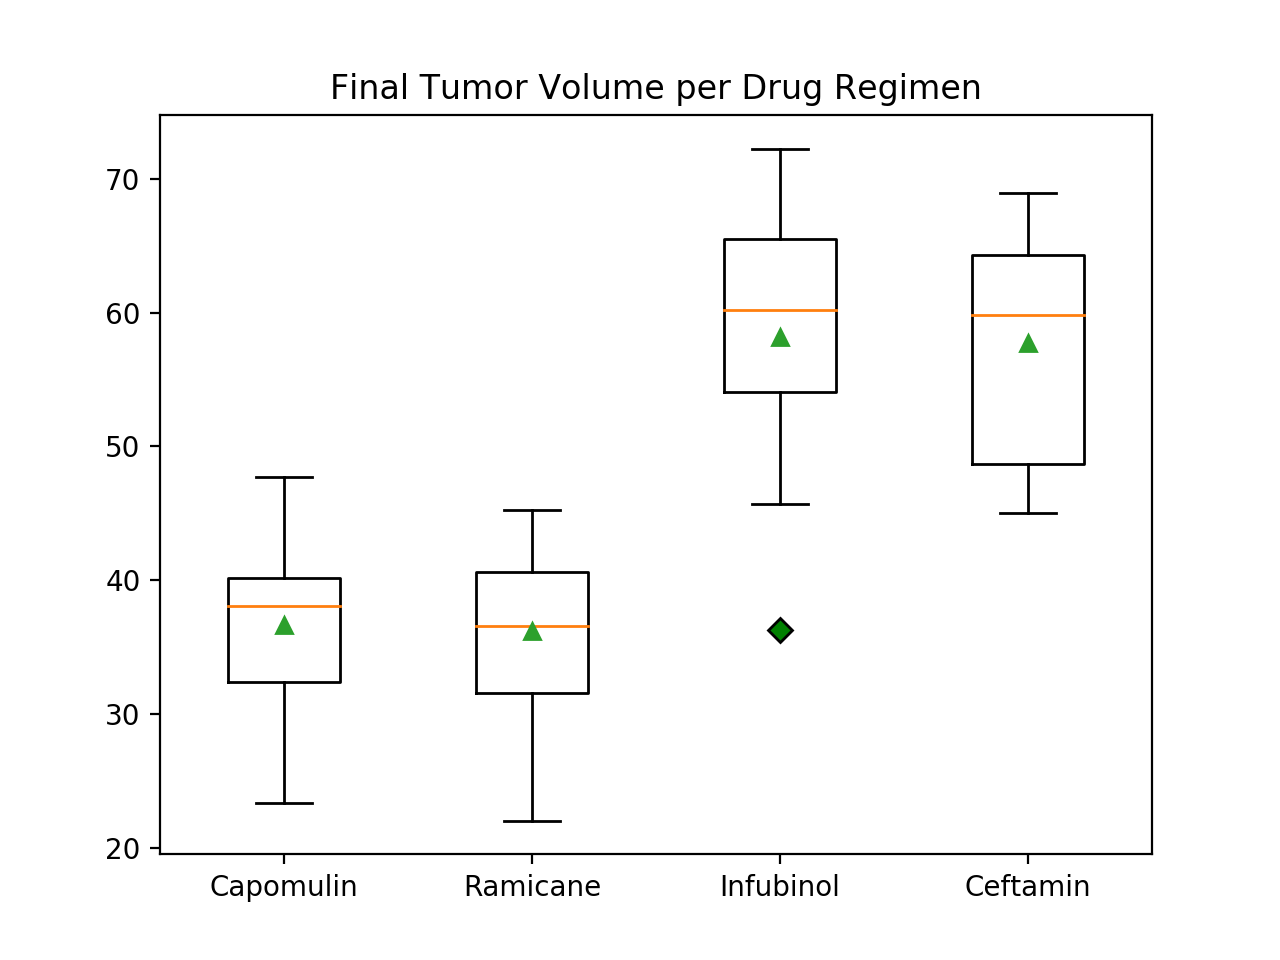

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_list, labels=treatments_list, showmeans=True, flierprops=green_diamond)
ax1.set_title("Final Tumor Volume per Drug Regimen")
plt.show()

## Line and Scatter Plots

In [19]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<IPython.core.display.Javascript object>


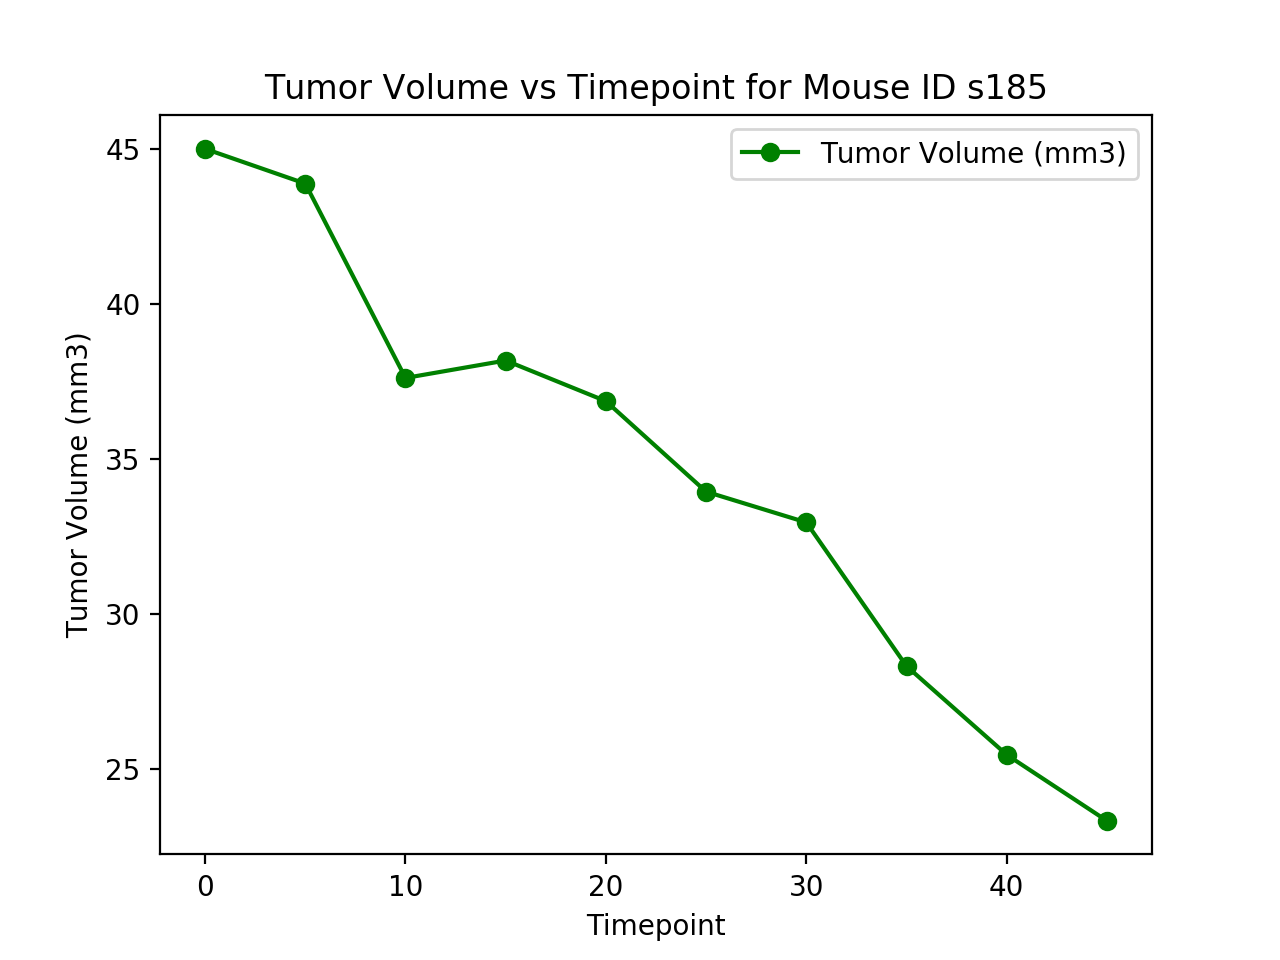

Text(0.5, 1.0, 'Tumor Volume vs Timepoint for Mouse ID s185')

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#print(capomulin_df.tail())

#Selecting the first mouse that is treating capomulin
#Can change the mouse ID by the index from 0-24
mouse = capomulin_df['Mouse ID'].unique()[0]
mouse_df = clean_df.loc[clean_df['Mouse ID'] == mouse]
#mouse_df

#line = mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", marker="o", color="g")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs Timepoint for Mouse ID {mouse}")

<IPython.core.display.Javascript object>


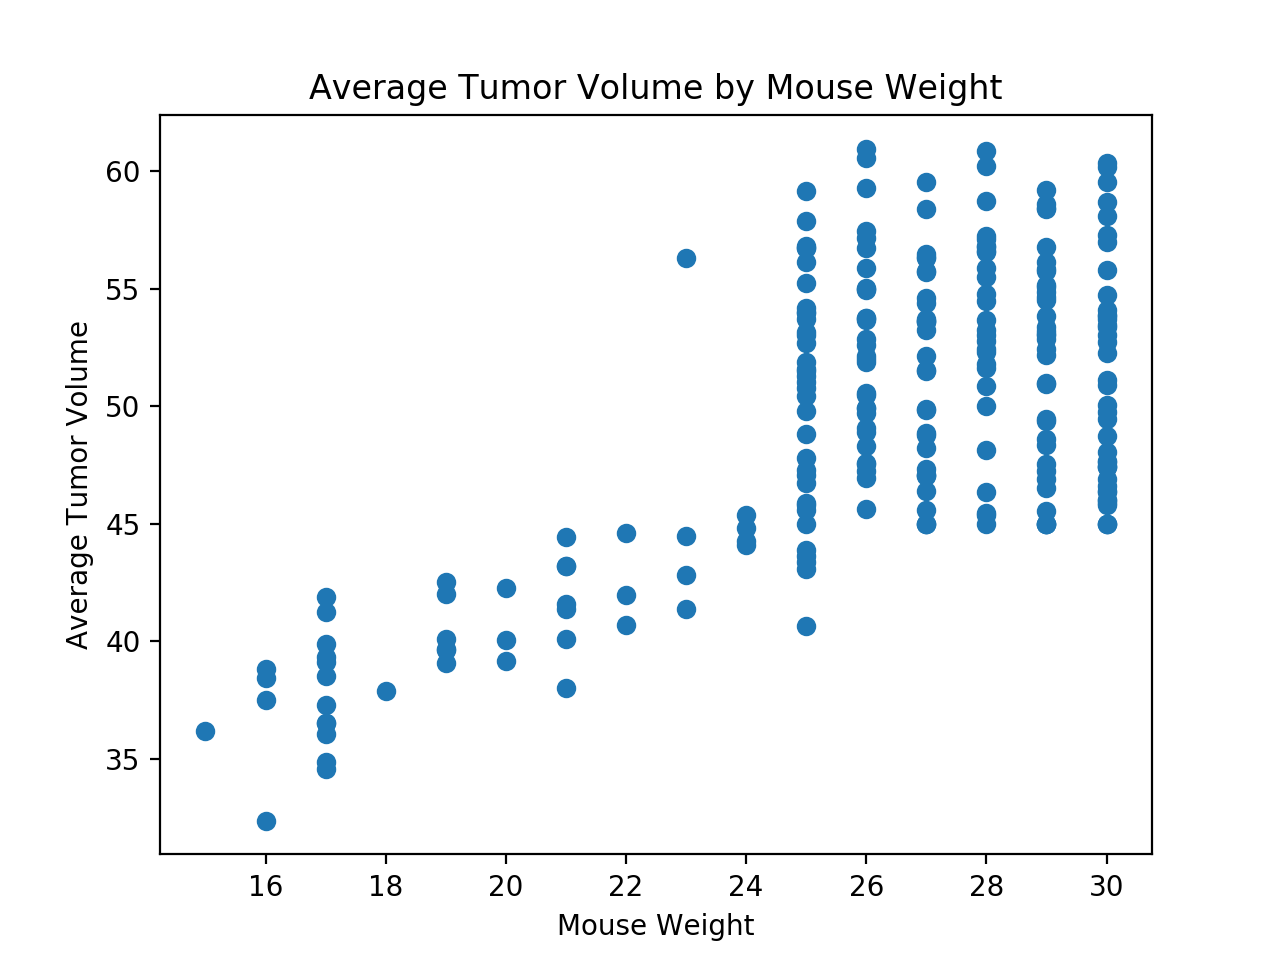

Text(0.5, 1.0, 'Average Tumor Volume by Mouse Weight')

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = clean_df.groupby(['Mouse ID']).mean()
#weight_df = weight_df['Weight (g)', 'Tumor Volume (mm3)']
weight = weight_df['Weight (g)']
average_vol = weight_df['Tumor Volume (mm3)']

plt.scatter(weight, average_vol)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume by Mouse Weight")

## Correlation and Regression

The Pearson's Correlation Coefficient is 0.6595577594236615
The equation for the linear regression is: y = 1.1x + 21.01


<IPython.core.display.Javascript object>


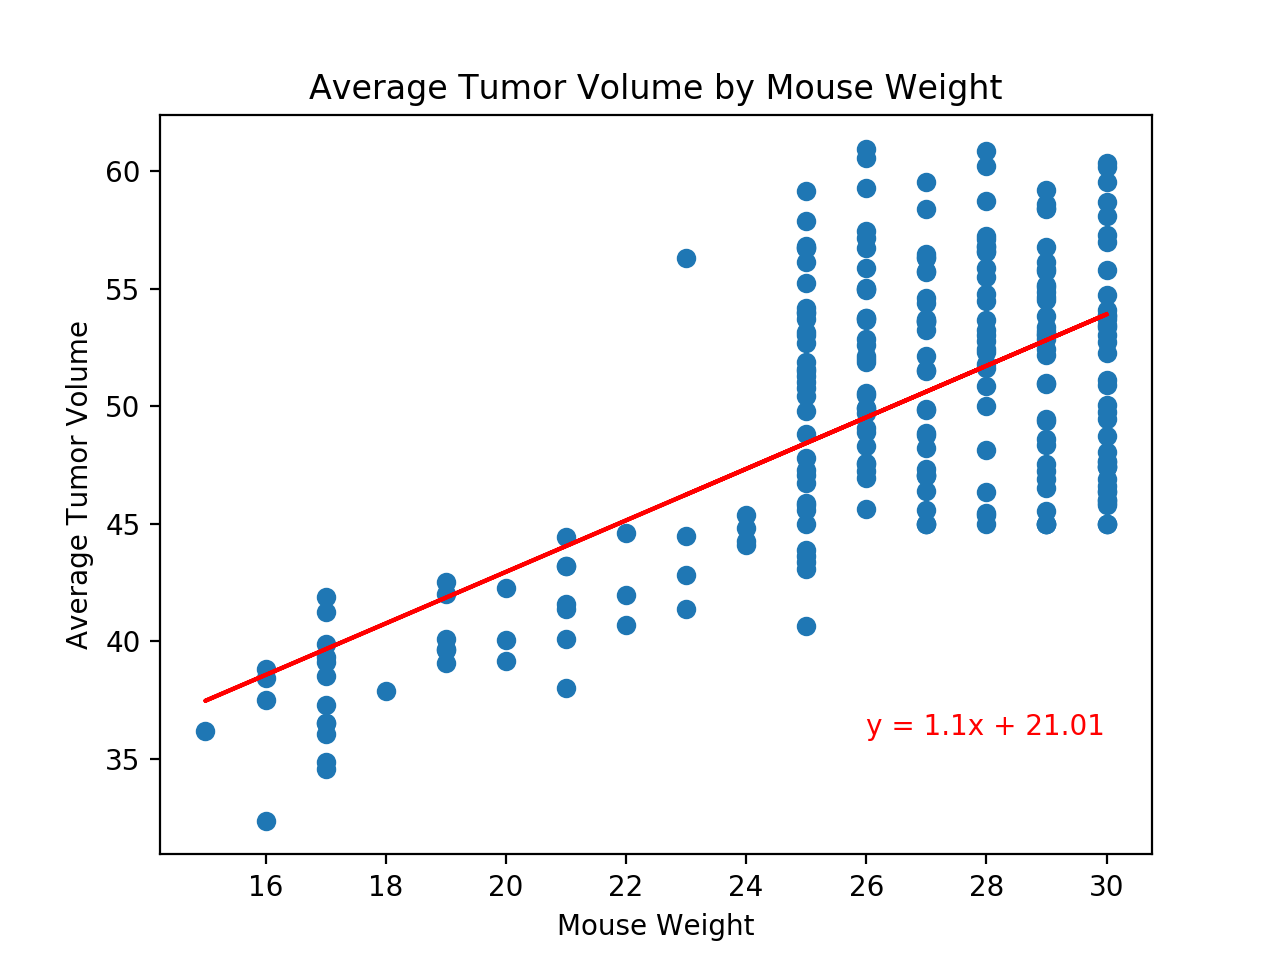

In [22]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficient
corr = st.pearsonr(weight, average_vol)
print(f"The Pearson's Correlation Coefficient is {corr[0]}" )

#
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, average_vol)
regress_values = weight * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
print(f"The equation for the linear regression is: {line_eq}")
plt.scatter(weight, average_vol)
plt.plot(weight, regress_values, "r-")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume by Mouse Weight")
plt.annotate(line_eq, (26, 36), fontsize=10, color="red")
plt.show()